# HW1 / Week1 LAB : Bayesian Belief Update

In [19]:
import numpy as np
np.set_printoptions(precision=3)
import pandas as pd
pd.set_option('display.precision',3)
import matplotlib.pyplot as plt

##  Case1: Beta-Binomial (unknown p)

In [10]:
from scipy.stats import binom, beta

### Sampling Density

It is essential to have a background knowledge of how this data is generated in deciding a distribution of our data. In this case, we have a data set from a coin toss, 
\begin{align} \mathbf{y}_i \in, where\ \mathbf{y} = 1 \ \ with \ a \ probability \ \mathbf{p}, \end{align} 
and our goal is to make Bayesian inference on the parameter $ \mathbf{p} $. In the bayesian's point of view, a parameter is not a constant, but a random variable.

In [15]:
# Population parameter
p = 0.4
# Generate toy sample
N = 20
np.random.seed(101)
data = binom.rvs(1,p,size=N) #Random varable sampling, by scipy.stats
print(data)
print(data.size)
print(data.sum())

[0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0]
20
8


### Prior Belief

Prior belief can be in any form (flat, peaked, skewed, bimodal...) as long as the belief satisfies the fundamental axioms of probability. -> Three axioms(P of event is greater than or equal to 0 / P of at least one event will occur in a sample space is one / sigma-additivity. We choose beta distribution to express our belief solely because of its analytic convenience, that is, the resulting posterior can be integrated. -> The suppot of beta distribution is from 0 to 1, so it matches to the parameter range,

Text(0, 0.5, 'p(theta)')

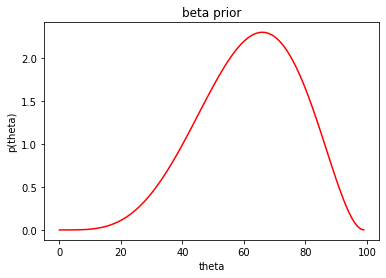

In [17]:
# Choose your belief parameter(beta parameter)
a = 5; b = 3

prior = beta(a, b) 
theta = np.linspace(0,1,100) # linearly spaced vectors.(splitting to several intervals)
plt.plot(prior.pdf(theta),color='r') #abbr of pyplot -> To draw a basic graph, we imported 'matplotlib.pyplot'
plt.title('beta prior') # equals to 'main' in R
plt.xlabel('theta') # equals to 'xlab in R'
plt.ylabel('p(theta)') # equals to 'ylab in R'

Text(0, 0.5, 'p(theta)')

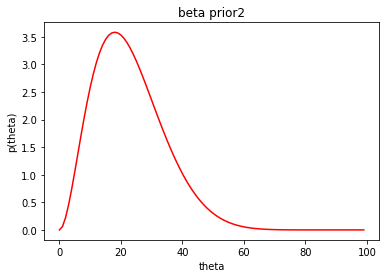

In [18]:
# You can always reflect other belief by tweaking your parameter
a2 = 3; b2 = 10

prior2 = beta(a2,b2)
theta = np.linspace(0,1,100)
plt.plot(prior2.pdf(theta),color='r')
plt.title('beta prior2')
plt.xlabel('theta')
plt.ylabel('p(theta)')

### Likelihood (Sampling Density)

Once you have specified your belief, you need to consider **"how likely"** the data is at each point of $\mathbf{p}$. What you would really come in handy is a plot where every possible hoice of p is on x-axis and the y-axis shows "how likely the data came from that choice of $\mathbf{p}$. Likelihood does exactly this.

(0, 5e-06)

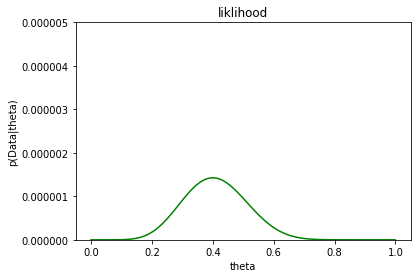

In [41]:
#Scipy stats package doesn't allow for plooting pdf-theta so we need to define formula directlyr.

def likelihood(D, p):
    N = D.size; suc = D.sum()
    theta = np.linspace(0,1,100)
    return p**suc * (1-p)**(N-suc)
# note that we neglected the constant as it will be cancelled out in applying Bayes Rule.
# In a likelihood function, we assume that data is known. However, we don't know the theta value. 

''' ** sign means a exponential function. Because we already have known 'Sampling density', we can
 ensure that the form of return as p^r*q^*(n-r). To get a liklihood function, we first have to get a joint probability of sampling density.
so suc has to be a sum of data.'''

plt. plot(theta, likelihood(data,theta), color='g')
plt.title("liklihood")
plt.xlabel("theta")
plt.ylabel("p(Data|theta)")
plt.ylim(0,0.000005)

### Posterior : Updated Belief

The posterior is defined by strictly applying Bayes Rule; 
$p(\theta|D)=\frac{p(\theta)p(D|\theta)}{\int p(\theta)p(D|\theta)d\theta}$ This is in most cases analytically intractable, but in this case where we have a **conjugacy** between the belief dist and the sampling dist(belief dist -> beta / sampling dist -> binomial), this simply reduces to updating belief parameters; a,b. Otherwise we have to approximate $p(\theta|D)$ or use numerical methods, such as MCMC.( -> In this case, there is no closed form.)

Text(0, 0.5, 'p(theta)')

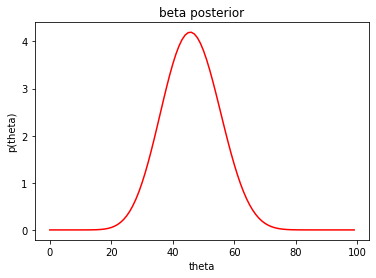

In [26]:
# Belief update
a_pos = a + data.sum()
b_pos = b + data.size - data. sum()

posterior = beta(a_pos, b_pos)
theta = np.linspace(0,1,100)
plt.plot(posterior.pdf(theta), color='r')
plt.title('beta posterior')
plt.xlabel('theta')
plt.ylabel('p(theta)')

(0, 5)

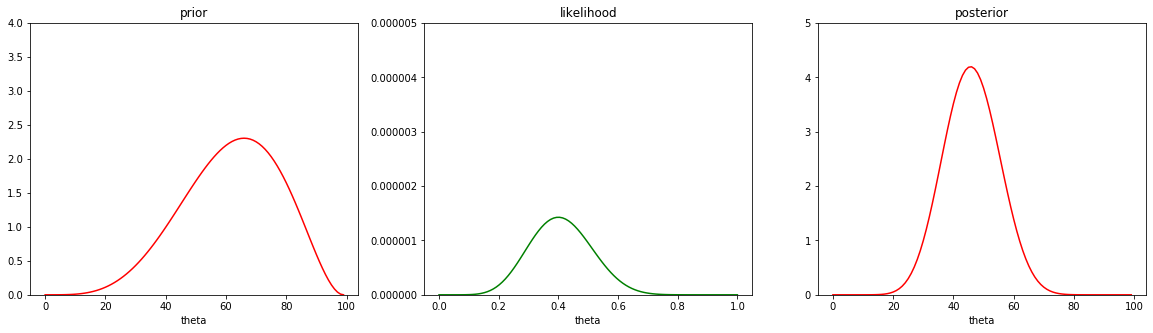

In [40]:
# in a nutshell;
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(131)
ax1.plot(prior.pdf(theta),color='r')
ax1.set_title('prior')
ax1.set_xlabel('theta')
ax1.set_ylim(0,4)

ax2 = fig.add_subplot(132)
ax2.plot(theta, likelihood(data, theta), color='g')
ax2.set_title('likelihood')
ax2.set_xlabel('theta')
ax2.set_ylim(0,0.000005)

ax3 = fig.add_subplot(133)
ax3.plot(posterior.pdf(theta), color='r')
ax3.set_title('posterior')
ax3.set_xlabel('theta')
ax3.set_ylim(0,5)

## (HW) Case 2: Gamma-Gaussian (unknown mu)

In [44]:
from scipy.stats import norm
import math

### Sampling Density

In [54]:
# population parameter
mu, sigma = 17, 1

# generate toy sample
N = 100
np.random.seed(101)
data = norm.rvs(mu,sigma,size=N)
print(data)
print(np.mean(data))
print(np.var(data))
xbar = np.mean(data); lmda = 1/np.var(data)

[19.707 17.628 17.908 17.504 17.651 16.681 16.152 17.606 14.982 17.74
 17.529 16.411 17.189 16.241 16.067 17.955 17.191 18.979 19.606 17.684
 17.303 18.694 15.294 15.841 16.865 17.391 17.167 17.185 17.808 17.073
 17.639 17.33  16.503 16.246 16.057 17.485 16.883 18.902 17.238 18.997
 16.007 17.197 15.863 17.    18.026 16.843 16.968 17.65  19.155 16.39
 16.245 16.654 17.147 16.521 17.559 18.025 16.074 18.863 15.866 17.61
 17.386 19.084 16.623 17.23  17.681 18.035 16.969 18.94  15.995 16.258
 17.187 16.267 15.617 18.482 17.961 14.859 17.993 18.192 15.953 18.293
 15.532 16.506 16.837 17.486 17.392 17.221 16.145 18.542 17.666 16.462
 16.431 18.407 17.642 16.095 16.609 18.028 15.027 16.133 17.721 15.777]
17.166369880423115
1.068781607086222


Text(0.5, 0, 'mu')

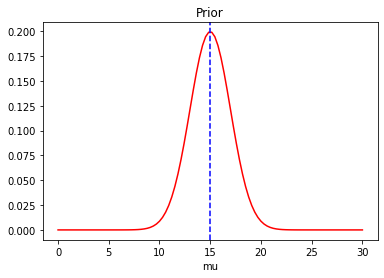

In [58]:
#choose your belief parameter
mu0, lmda_mu0 = 15, 0.5
prior = norm(loc=mu0, scale=1/lmda_mu0)
theta = np.linspace(0,30,100)
plt.plot(theta, prior.pdf(theta), 'r')
plt.axvline(15, color='b', linestyle='--')
plt.title("Prior")
plt.xlabel("mu")

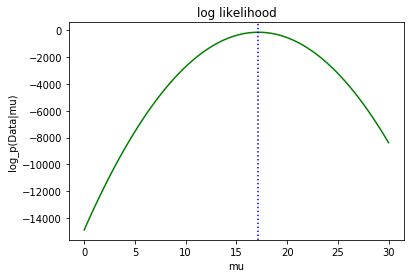

In [62]:
# define formula directly.

def likelihood(x, mu):
    j_pdf = 0
    for i in x:
        j_pdf += np.log(norm.pdf(i, mu, 1))
    return j_pdf

plt.plot(theta, likelihood(data, theta), color='g')
plt.title("log likelihood")
plt.xlabel("mu")
plt.ylabel("log_p(Data|mu)")
plt.axvline(xbar, color = 'b', linestyle = ':')

$ \lambda_N = \lambda_0 + n\lambda$  
$ \mu_N = \frac{\lambda_0}{\lambda_0+n\lambda}\mu_0+\frac{n\lambda}{\lambda_0+n\lambda}\mu_{ML}$

Text(0.5, 0, 'mu')

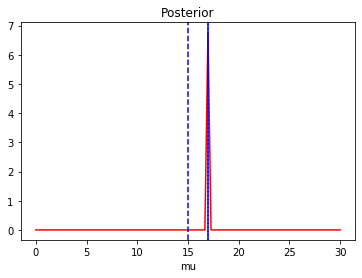

In [65]:
# Belief update (When we know that posterior dist would be normal, we can easily derive coefficients by comparison.)

lmda_mu_pos = lmda_mu0 + data.size * lmda
mu_pos = (lmda_mu0 * mu0 + data.size * lmda * mu)/(lmda_mu0 + data.size * lmda)
posterior = norm(loc=mu_pos, scale=1/lmda_mu_pos)
theta = np.linspace(0,30,100)
plt.plot(theta, posterior.pdf(theta), 'r')
plt.axvline(15,color='b', linestyle='--')
plt.axvline(mu_pos, color='b')
plt.axvline(mu, color='b', linestyle = ':')
plt.title("Posterior")
plt.xlabel("mu")


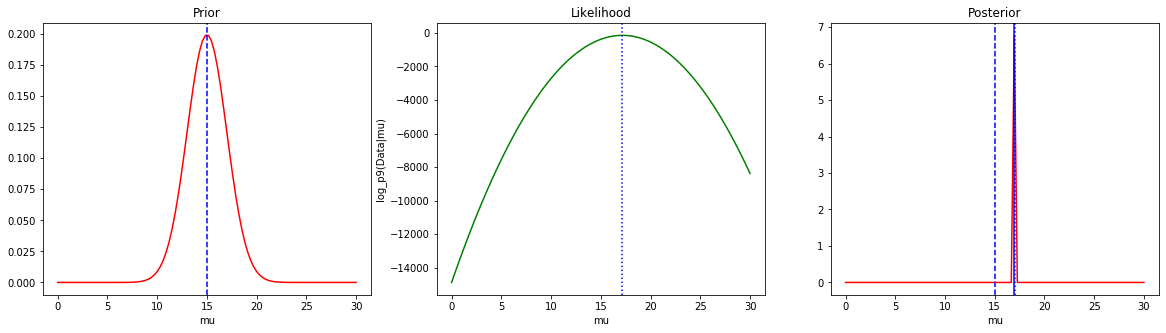

In [67]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(131)
ax1.plot(theta, prior.pdf(theta), 'r')
ax1.set_title('Prior')
ax1.set_xlabel('mu')
ax1.axvline(15, color='b', linestyle ='--')

ax2 = fig.add_subplot(132)
ax2.plot(theta, likelihood(data,theta), color='g')
ax2.set_title('Likelihood')
ax2.set_xlabel('mu')
ax2.set_ylabel('log_p9(Data|mu)')
ax2.axvline(np.mean(data), color='b', linestyle = ':')

ax3 = fig.add_subplot(133)
ax3.plot(theta, posterior.pdf(theta), 'r')
ax3.set_title('Posterior')
ax3.set_xlabel('mu')
ax3.axvline(15, color='b', linestyle='--')
ax3.axvline(mu_pos, color='b')
ax3.axvline(mu, color='b', linestyle = ':')